# Convolutional Neural Network
## Week-7 - 2023

**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [ ]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

In [ ]:
# Load the CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)
print('X_test size:  ',X_test.shape)
print('y_test size:  ',y_test.shape)

X_train size:  (50000, 32, 32, 3)
y_train size:  (50000, 1)
X_test size:   (10000, 32, 32, 3)
y_test size:   (10000, 1)


In [ ]:
# Class names in the CIFAR-10 dataset

classes=['aircraft', 'car', 'bird', 'cat', 'deer',
 'dog', 'frog', 'hours', 'ship', 'truck']

classes

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'hours',
 'ship',
 'truck']

<function matplotlib.pyplot.show(close=None, block=None)>

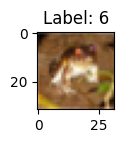

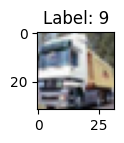

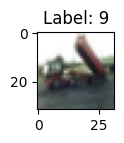

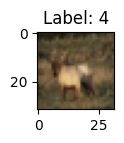

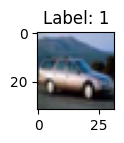

In [5]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
#
#
# Your code to display a few images before the model development.
for i in range(5):
  plt.figure(figsize=(1,1))
  plt.imshow(X_train[i])
  plt.title(f"Label: {y_train[i][0]}")
plt.show
#
#

In [6]:
# Preprocess the data

X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

### MLP model

In [7]:
# Create an MLP model using Keras

mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# print the MLP model

print(mlp_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [8]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train and evaluate the MLP classifier

history = mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.8614 - accuracy: 0.3254
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6680 - accuracy: 0.4041
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5875 - accuracy: 0.4311
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5377 - accuracy: 0.4508
Epoch 5/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.5018 - accuracy: 0.4633
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4742 - accuracy: 0.4729
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4465 - accuracy: 0.4844
Epoch 8/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.4271 - accuracy: 0.4912
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4069 - accuracy: 0.4963
Epoch 10/10
1563/1563 [==============================] - 39s 25m

<ipython-input-10-1ec4f8fba4bc>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


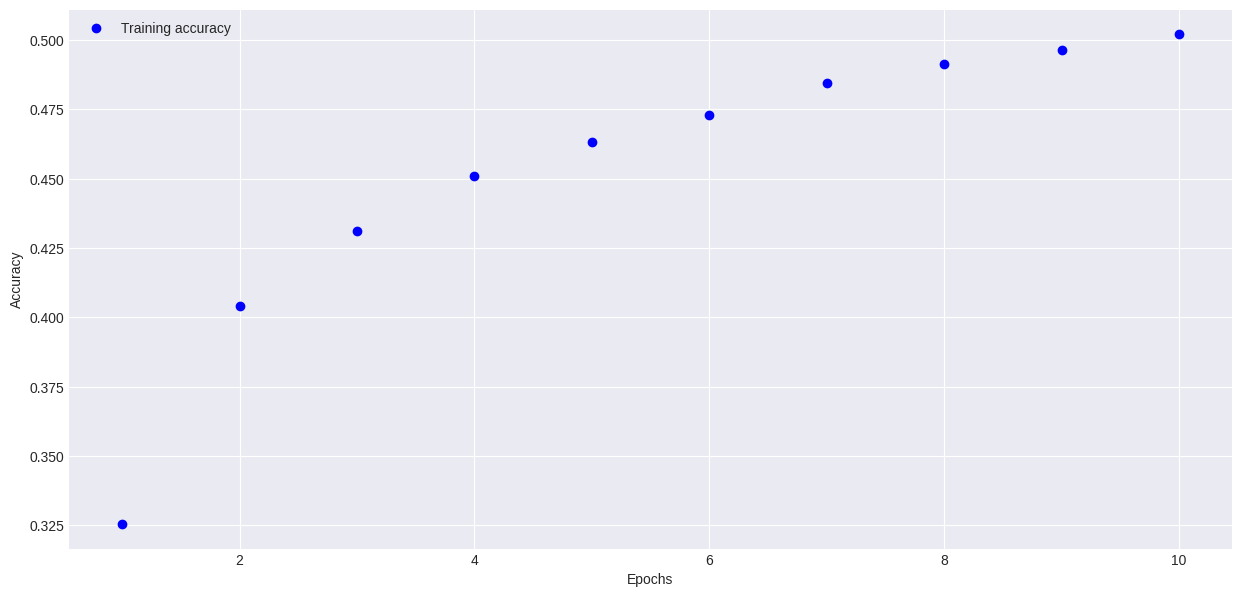

In [10]:
 # Print the training process graph and result

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
# evaluation - Accuracy result on the Test set

mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 47.10%


### CNN model

In [12]:
# Create a CNN model using Keras

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# print the CNN model

print(cnn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [13]:
# compilation

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train and evaluate the CNN classifier

history2 = cnn_model.fit(X_train, y_train, epochs=10, verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5349 - accuracy: 0.4408
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1690 - accuracy: 0.5883
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9949 - accuracy: 0.6497
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8926 - accuracy: 0.6879
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8171 - accuracy: 0.7125
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7611 - accuracy: 0.7333
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7119 - accuracy: 0.7492
Epoch 8/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6684 - accuracy: 0.7655
Epoch 9/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.6332 - accuracy: 0.7780
Epoch 10/10
1563/1563 [==============================] - 69s 44m

<ipython-input-15-ccf6d76a7c55>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


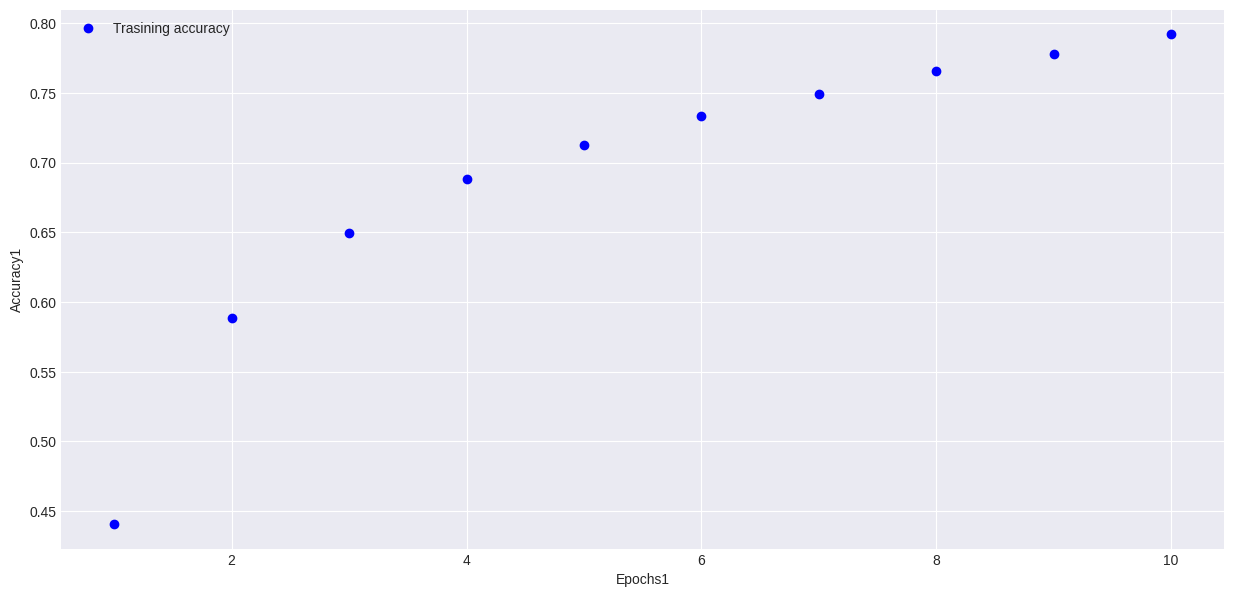

In [15]:
# Your code to print the CNN training process graph and result
#
history_dict1 = history2.history
plt.style.use('seaborn-darkgrid')

acc_values2 = history_dict1['accuracy']
epochs1 = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs1, acc_values2, 'bo', label='Trasining accuracy')
plt.xlabel('Epochs1')
plt.ylabel('Accuracy1')
plt.legend()

plt.show()
#
#


In [16]:
# evaluation - Accuracy result on the Test set

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 71.39%


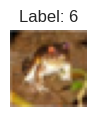

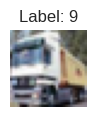

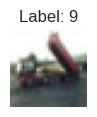

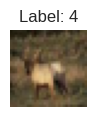

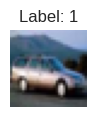

In [17]:
# Display a few images after CNN model development

for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [19]:
# Your code to do the above activity.
# Hint - import time
import time
from keras.optimizers import  Adafactor,Nadam,Ftrl
from keras.utils import to_categorical

In [21]:
# Your code to do the above activity.
# Hint - Put name of optimizers

optimizers = [Adafactor(),Nadam(),Ftrl()]

In [23]:
# Your code to do the above activity.
# Hint - Store training time and accuracy in lists
training_times = []
histories = []
accuracies=[]


In [24]:
# Your code to do the above activity.
# Hint - import time and use time.time() just before and after training to record start and end time of the training. Difference will provide the training time.

def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model


In [25]:
# Your code to do the above activity.
# Hint - use loops for use different optimizers

for optimizer in optimizers:
    model = create_cnn_model()  # Create a new model for each optimizer
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), verbose=1)
    end_time = time.time()
    histories.append(history)
    training_times.append(end_time - start_time)
    accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)




Epoch 1/3
1563/1563 [==============================] - 79s 49ms/step - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/3
1563/1563 [==============================] - 73s 47ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/3
1563/1563 [==============================] - 70s 45ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 1/3
1563/1563 [==============================] - 73s 45ms/step - loss: 1.4223 - accuracy: 0.4892 - val_loss: 1.1630 - val_accuracy: 0.5948
Epoch 2/3
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0756 - accuracy: 0.6221 - val_loss: 1.0256 - val_accuracy: 0.6434
Epoch 3/3
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9527 - accuracy: 0.6668 - val_loss: 0.9672 - val_accuracy: 0.6689
Epoch 1/3
1563/1563 [==============================] - 64s 40ms/step - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epo

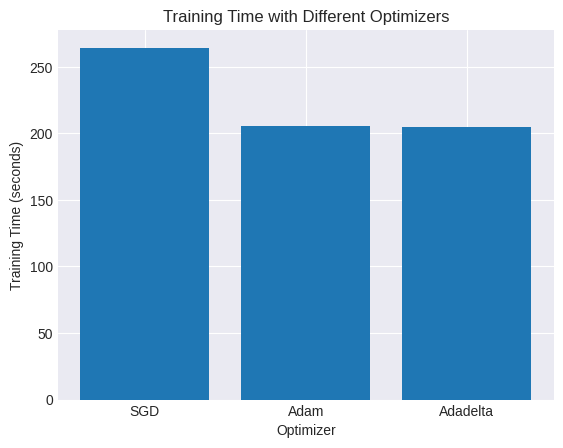

In [26]:
# Your code to do the above activity.
# Generate a bar plot to compare training times
optimizer_names = ["SGD", "Adam", "Adadelta"]
plt.bar(optimizer_names, training_times)
plt.ylabel('Training Time (seconds)')
plt.xlabel('Optimizer')
plt.title('Training Time with Different Optimizers')
plt.show()


Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.


In [27]:
# Print accuracies achieved with different optimizers
for i, optimizer in enumerate(optimizers):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracy * 100:.2f}%")

<keras.src.optimizers.adafactor.Adafactor object at 0x7c0645053490> Optimizer - Test Accuracy: 10.00%
<keras.src.optimizers.nadam.Nadam object at 0x7c0645053310> Optimizer - Test Accuracy: 10.00%
<keras.src.optimizers.ftrl.Ftrl object at 0x7c0645052b00> Optimizer - Test Accuracy: 10.00%


In [28]:
# Your code to
# Find and print the highest achieved accuracy

print("Adam Optimizer")

Adam Optimizer
